In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aa.csv to aa.csv


In [ ]:
data = pd.read_csv("aa.csv")   #aa.csv is the file name
display(data)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


'def correlation(dataset, threshold):\n    col_corr = set() # Set of all the names of deleted columns\n    corr_matrix = dataset.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):\n                colname = corr_matrix.columns[i] # getting the name of column\n                col_corr.add(colname)\n                if colname in dataset.columns:\n                    del dataset[colname] # deleting the column from the dataset\n    return dataset\ndata = correlation(data,0.5)\nprint(data)'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


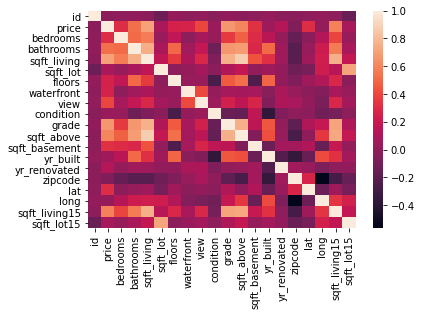

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)

In [ ]:

X_train = data.drop(["id","date","price"],axis = 1).copy().T
Y_train = np.array([data["price"].copy()]).T
X_train = np.array(X_train)
X = np.copy(X_train)
Y = np.copy(Y_train)
X_train = X_train[:,0:17290]
Y_train = Y_train[0:17290,:]
X_test  = X[:,17290:21613]
Y_test  = Y[17290:21613,:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18, 17290)
(17290, 1)
(18, 4323)
(4323, 1)


In [ ]:
mean = np.array([np.mean(X_train,axis = 1)]).T
max = np.array([np.max(X_train,axis = 1)]).T
min = np.array([np.min(X_train,axis = 1)]).T
var = np.array([np.mean(X_train*X_train,axis = 1)]).T
X_train = ((X_train - mean)/(max - min)).T
print(X_train.shape)
mean = np.array([np.mean(X_test,axis = 1)]).T
max = np.array([np.max(X_test,axis = 1)]).T
min = np.array([np.min(X_test,axis = 1)]).T
var = np.array([np.mean(X_test*X_test,axis = 1)]).T
X_test = ((X_test - mean)/(max - min)).T
print(X_test.shape)

(17290, 18)
(4323, 18)


In [ ]:
#X_test = X_test.T
for j in range(X_test.shape[1]) :
  a = np.copy(X_test[:,j]) 
  for i in range(2,7) :
    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T  
    elif i == 4:
      temp = np.array([np.sin(a)]).T
    elif i == 5 :
      temp = np.array([np.sin(3*a)]).T
    elif i == 6 :
      temp = np.array([np.power(a,i-1)]).T
    elif i == 7 :
      #temp == np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
      temp = np.array([np.sin(5*a)]).T
    elif i == 8 :
      #temp == np.array([np.sin(a*a*a)]).T
      temp = np.array([np.sin(7*a)]).T
    elif i == 9 :
      temp = np.array([np.sin(9*a)]).T
    else:
      if j != X_train.shape[1] - 2 :
        temp = np.array([np.multiply(a,X_test[:,j+1])]).T
      else :
        temp = np.array([np.multiply(a,X_test[:,-1])]).T  
    print(temp.shape)
    X_test = np.hstack((X_test,temp))
X_test = X_test.T
print(X_test.shape)

In [ ]:

for j in range(X_train.shape[1]) :
  a = np.copy(X_train[:,j]) 
  for i in range(2,7) :
    if i==2:
      temp = np.array([np.power(a,i)]).T
    elif i==3:
      temp = np.array([np.power(a,i)]).T  
    elif i == 4:
      temp = np.array([np.sin(a)]).T
    elif i == 5 :
      temp = np.array([np.sin(3*a)]).T
    elif i == 6 :
      temp = np.array([np.power(a,i-1)]).T
    elif i == 7 :
      #temp == np.array([np.sin(a)*np.sin(a)*np.sin(a)]).T
      temp = np.array([np.sin(5*a)]).T
    elif i == 8 :
      #temp == np.array([np.sin(a*a*a)]).T
      temp = np.array([np.sin(7*a)]).T
    elif i == 9 :
      temp = np.array([np.sin(9*a)]).T
    else:
      if j != X_train.shape[1] - 2 :
        temp = np.array([np.multiply(a,X_train[:,j+1])]).T
      else :
        temp = np.array([np.multiply(a,X_train[:,-1])]).T  
    print(temp.shape)
    X_train = np.hstack((X_train,temp))
X_train = X_train.T
print(X_train.shape)

In [ ]:
X_train = X_train.T
X_test  = X_test.T

In [ ]:
X_train = np.hstack((np.ones((17290,1)) , X_train))
print(X_train)
print(X_train.shape)
X_test = np.hstack((np.ones((4323,1)) , X_test))
print(X_test)
print(X_test.shape)

In [ ]:
W = np.zeros((X_train.shape[1],1))
num_itr = 30000
lr = 0.8

In [ ]:
from sklearn.metrics import r2_score
for i in range(0,num_itr) :
  h = np.dot(X_train,W) 
  W = W - (lr/X_train.shape[0])*np.dot(X_train.T,h - Y_train)
  #b = b - (lr/X_train.shape[0])*np.sum(h - Y_train)
  h = np.dot(X_train,W)
  cost = (1/(2*X_train.shape[0]))*np.sum((h - Y_train)*(h - Y_train))
  print(cost,i)
  print(r2_score(Y_test,np.dot(X_test,W)))

In [ ]:
print(W)

In [ ]:

print(np.sum(Y_train))
print(np.sum(h))

In [ ]:
print(np.sum((Y_train - h)*(Y_train - h)))

In [ ]:
print(h,Y_train)

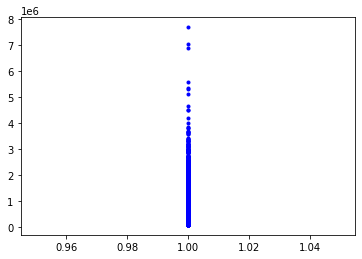

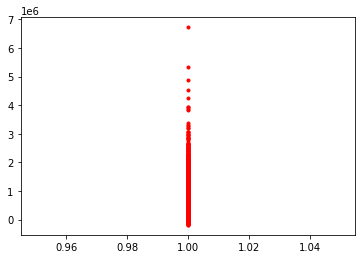

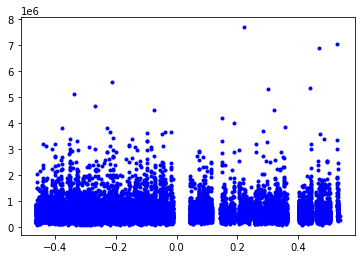

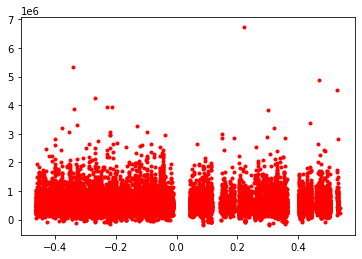

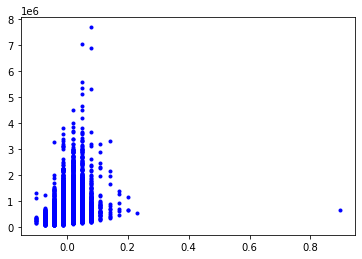

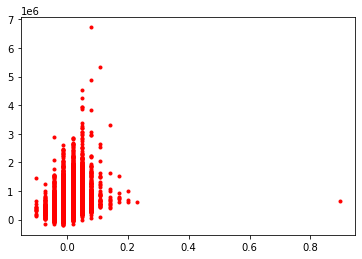

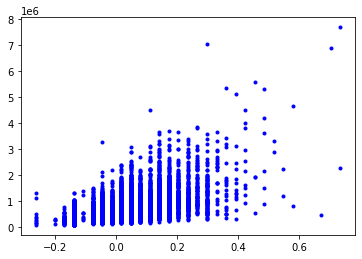

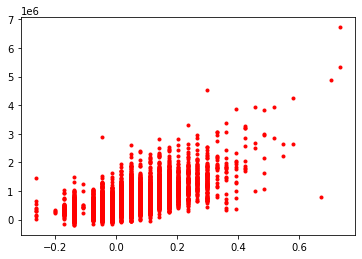

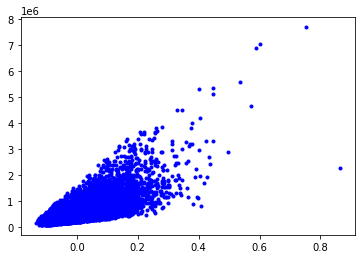

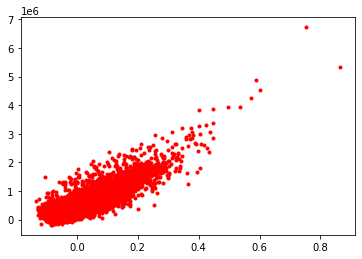

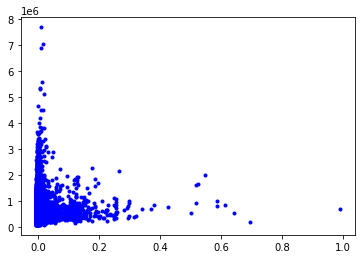

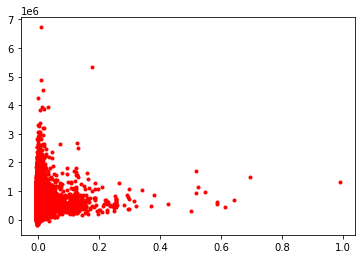

In [ ]:
for i in range(6) :
  plt.plot(X_train[:,i],Y_train,"r.",color = "blue")
  plt.show()
  plt.plot(X_train[:,i],h,"r.",color = "red" )
  plt.show()

In [ ]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_train,h)
print(r2) 

0.8131120844893954


In [ ]:
print(r2_score(Y_test,np.dot(X_test,W)))

0.7483418864970399


In [ ]:
print(np.dot(X_test,W))

In [ ]:
print(Y_test)

In [ ]:
print(Y_test)

In [ ]:
for i in range(Y_test.shape[0]) :
  print(Y_train[i,:])